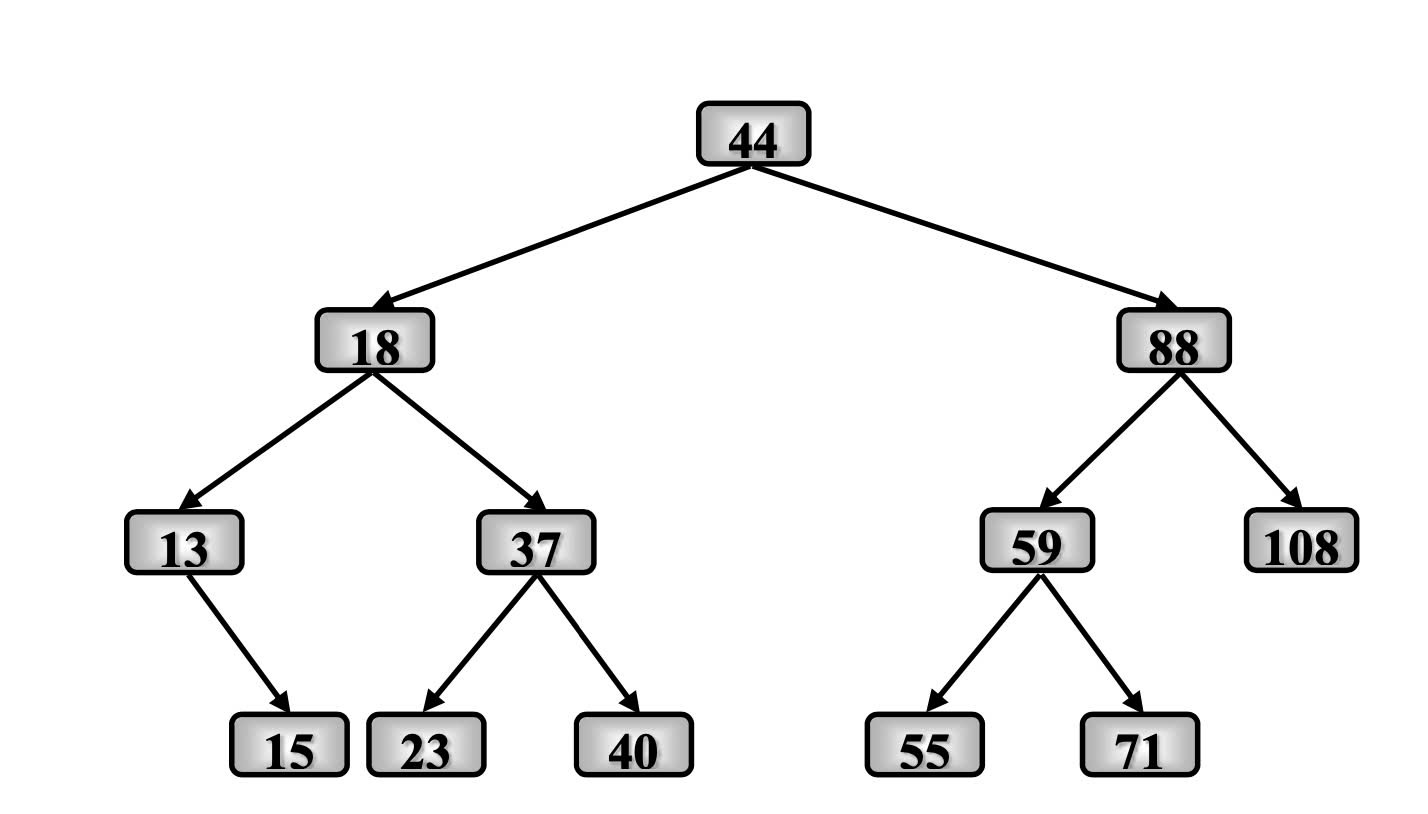

Hãy viết các chương trình con sau thực hiện trên cây nhị phân:
1. Kiểm tra cây rỗng
2. Kiểm tra nút n có phải là nút lá không.
3. Kiểm tra nút n có phải là nút cha của nút m không.
4. Tính chiều cao của cây.
5. Tính số nút của cây
6. Duyệt tiền tự, trung tự, hậu tự.
7. Đếm số nút lá của cây.
8. Đếm số nút trung gian của cây.
9. Nút có giá trị lớn nhất, nhỏ nhất, tổng giá trị các nút, trung bình giá trị các nút

In [4]:
class Node:
    def __init__(self, data):
        self.data = data
        self.ds = []

    def is_empty(self):
        return self.data is None and len(self.ds) == 0

    def is_leaf(self):
        return len(self.ds) == 0

    def is_parent_of(self, m):
        return m in self.ds or any(child.is_parent_of(m) for child in self.ds)

    def height(self):
        if self.is_leaf():
            return 0
        return 1 + max(child.height() for child in self.ds)

    def count_nodes(self):
        return 1 + sum(child.count_nodes() for child in self.ds)

    def preorder(self):
        print(self.data, end=' ')
        for child in self.ds:
            child.preorder()

    def postorder(self):
        for child in self.ds:
            child.postorder()
        print(self.data, end=' ')

    def count_leaves(self):
        if self.is_leaf():
            return 1
        return sum(child.count_leaves() for child in self.ds)

    def count_internal_nodes(self, is_root=True):
        if self.is_leaf():
            return 0
        count = sum(child.count_internal_nodes(False) for child in self.ds)
        return count + (0 if is_root else 1)

    def find_all_values(self):
        values = [self.data]
        for child in self.ds:
            values.extend(child.find_all_values())
        return values

    def max_value(self):
        return max(self.find_all_values())

    def min_value(self):
        return min(self.find_all_values())

    def sum_values(self):
        return sum(self.find_all_values())

    def avg_value(self):
        values = self.find_all_values()
        return sum(values) / len(values)

# ---------------- TẠO CÂY THEO HÌNH VẼ -------------------

# Các nút lá
n15 = Node(15)
n23 = Node(23)
n40 = Node(40)
n55 = Node(55)
n71 = Node(71)
n108 = Node(108)

# Các nút trung gian
n13 = Node(13)
n13.ds = [n15]

n37 = Node(37)
n37.ds = [n23, n40]

n59 = Node(59)
n59.ds = [n55, n71]

n18 = Node(18)
n18.ds = [n13, n37]

n88 = Node(88)
n88.ds = [n59, n108]

# Gốc cây
root = Node(44)
root.ds = [n18, n88]

# ---------------- TEST -------------------

print("1. Cây có rỗng không?", root.is_empty())
print("2. Node 15 có phải là lá không?", n15.is_leaf())
print("3. Node 18 có phải là cha của node 37 không?", n18.is_parent_of(n37))
print("4. Chiều cao của cây:", root.height())
print("5. Tổng số nút:", root.count_nodes())

print("6. Duyệt cây:")
print("   Tiền tự:", end=' '); root.preorder(); print()
print("   Hậu tự: ", end=' '); root.postorder(); print()

print("7. Số nút lá:", root.count_leaves())
print("8. Số nút trung gian (không tính gốc):", root.count_internal_nodes())

print("9. Max:", root.max_value())
print("   Min:", root.min_value())
print("   Tổng:", root.sum_values())
print("   Trung bình:", root.avg_value())


1. Cây có rỗng không? False
2. Node 15 có phải là lá không? True
3. Node 18 có phải là cha của node 37 không? True
4. Chiều cao của cây: 3
5. Tổng số nút: 12
6. Duyệt cây:
   Tiền tự: 44 18 13 15 37 23 40 88 59 55 71 108 
   Hậu tự:  15 13 23 40 37 18 55 71 59 108 88 44 
7. Số nút lá: 6
8. Số nút trung gian (không tính gốc): 5
9. Max: 108
   Min: 13
   Tổng: 571
   Trung bình: 47.583333333333336
